# Tarea 2. NN with LMS, Problema 1

## Fundamentos de inteligencia computacional
## por: Juan Pablo Arango A. & Simón Zapata Caro

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from pandas.tools.plotting import scatter_matrix
from matplotlib.artist import setp
import time

plt.rcParams['figure.figsize'] = (10,16)

In [2]:
df1     = pd.io.excel.read_excel("DatosPunto1.xlsx", sheetname=0)
labels = df1.iloc[:,-2].copy()
df1 = df1.iloc[:,0:-2].copy()

X = np.array(df1)
y = np.array(labels)
X_original = X
y_original = y

In [3]:
def derivating(fx):
    difcoefs = [1,-1]
    return np.convolve(fx,difcoefs,mode='same')

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

def clearList(L): #arroja una lista de L elementos vacios, no sabia de qué otra forma hacerla
    listica = []
    for i in range(0,L):
        listica.append([]);
    return listica

def LMS_training(X,y,iteraciones=500,alpha=0.1,de_min=0.01):
    
    w_          = np.random.rand(X.shape[1] + 1,)
    n           = X.shape[0]
    nf          = X.shape[1]
    sw          = 0
    j           = 0
    index       = []
    error_array = []
    

    while j < iteraciones and sw == 0:
        for i in range(0,n):
            g  = np.dot(w_,np.insert(X[i,:],0,1).T)
            e  = g - y[i]
            w_ = w_ - alpha*e*np.insert(X[i,:],0,1)
        predicted = []
        for i in range(0,n):
            predicted.append(Predict(X[i,:],w_))
        g = (y-predicted)
        E = 0.5*np.sum(g*g.T)/y.shape[0]
        
        index.append(j)
        error_array.append(E)
        d_error_array = derivating(error_array)
        
        if np.abs(d_error_array[len(d_error_array)-1]) < de_min:
            sw = 1
        
        j = j + 1
    #print('Función de error: '+str(E)+' iterando ' +str(j)+' veces, con alpha: '+str(alpha))
    
    return [w_,predicted,E,j]

def Predict(X,w_): 
    return np.dot(w_,np.insert(X,0,1).T)


In [4]:
Nsamples = X.shape[0]
Ntrain   = int(0.7*Nsamples)
Nval     = int(0.15*Nsamples)
Ntest    = Nsamples-Ntrain-Nval

X_test = X[(Nsamples-Ntest):Nsamples,:]
y_test = y[(Nsamples-Ntest):Nsamples  ]

Xv = X[0:(Nsamples-Ntest),:]
yv = y[0:(Nsamples-Ntest)  ]

minimo    = np.min(X,axis=0)
maximo    = np.max(X,axis=0)
print(minimo.shape,maximo.shape)

(8,) (8,)


### Entrenamiento de la red neuronal usando validación bootstraping para $\alpha = logspace(10^{-5}, 0.5=10^{-0.30102}, N = 30)$

- Error utilizado: $MAE = \dfrac{1}{N} \sum_{i=1}^{N}|y_{pred}-y_i|$

In [5]:
intentos  = 10
alpha     = np.logspace(-5,-0.30102,num=30)
ecm_train = np.zeros((intentos,len(alpha)))
ecm_val   = np.zeros((intentos,len(alpha)))

Xv = (Xv-minimo)/(maximo-minimo)

for k in range(0,intentos):
    index=np.random.permutation(Xv.shape[0])
    X1    = Xv[index,:]
    y1    = yv[index  ]

    X_train = X1[0:Ntrain,:]
    y_train = y1[0:Ntrain  ]
    X_val   = X1[Ntrain:(Ntrain+Nval),:]
    y_val   = y1[Ntrain:(Ntrain+Nval)  ]
    
    wLMS       = clearList(len(alpha))
    predicted1 = clearList(len(alpha))
    predicted2 = clearList(len(alpha))
    ecm1       = clearList(len(alpha))
    ecm2       = clearList(len(alpha))
    for i in range(len(alpha)):
        [wLMS[i],predicted1[i],E,Ni] = LMS_training(X_train,y_train,iteraciones=1000,de_min=0.001,alpha=alpha[i])
        ecm1[i] = np.sum(np.abs(predicted1[i]-y_train))/y_train.shape[0]
        p_i = []
        for j in range(0,X_val.shape[0]):
            p_i.append(Predict(X_val[j,:],wLMS[i]))
        predicted2[i] = p_i
        ecm2[i] = np.sum(np.abs(predicted2[i]-y_val))/y_val.shape[0]
        print('validación ',(k+1),' Función de error: ',str(E),' iterando ',str(Ni),' veces, con alpha: ',str(alpha[i]))
    ecm_train[k,:] = ecm1
    ecm_val[k,:]   = ecm2
    

validación  1  Función de error:  6.6742200350333984  iterando  1000  veces, con alpha:  1e-05
validación  1  Función de error:  5.883339718095569  iterando  1000  veces, con alpha:  1.4522246129615342e-05
validación  1  Función de error:  5.290986522276334  iterando  1000  veces, con alpha:  2.108956326491282e-05
validación  1  Función de error:  4.999206217076234  iterando  898  veces, con alpha:  3.0626782849915814e-05
validación  1  Función de error:  4.834835991662055  iterando  707  veces, con alpha:  4.447696787047604e-05
validación  1  Función de error:  4.756689182287894  iterando  581  veces, con alpha:  6.459054745140466e-05
validación  1  Función de error:  4.684311367336531  iterando  462  veces, con alpha:  9.379998277358975e-05
validación  1  Función de error:  4.630613828267746  iterando  351  veces, con alpha:  0.00013621864367917524
validación  1  Función de error:  4.6052766891641  iterando  288  veces, con alpha:  0.00019782006709513538
validación  1  Función de err

validación  3  Función de error:  4.397787278503935  iterando  73  veces, con alpha:  0.00568295847582728
validación  3  Función de error:  4.393218051833128  iterando  58  veces, con alpha:  0.008252932173034749
validación  3  Función de error:  4.392038903721269  iterando  48  veces, con alpha:  0.011985111230783184
validación  3  Función de error:  4.38462358580787  iterando  44  veces, con alpha:  0.017405073518425063
validación  3  Función de error:  4.35661573383518  iterando  48  veces, con alpha:  0.025276076153861914
validación  3  Función de error:  4.306073413623207  iterando  74  veces, con alpha:  0.03670653990972842
validación  3  Función de error:  4.270167874176073  iterando  82  veces, con alpha:  0.053306140713562516
validación  3  Función de error:  4.2600994338942835  iterando  76  veces, con alpha:  0.0774124895662265
validación  3  Función de error:  4.302651742223743  iterando  57  veces, con alpha:  0.11242032269870207
validación  3  Función de error:  4.5155442

validación  6  Función de error:  5.200818890426165  iterando  741  veces, con alpha:  4.447696787047604e-05
validación  6  Función de error:  5.115917527090077  iterando  629  veces, con alpha:  6.459054745140466e-05
validación  6  Función de error:  5.088686479083449  iterando  477  veces, con alpha:  9.379998277358975e-05
validación  6  Función de error:  4.996542045912154  iterando  386  veces, con alpha:  0.00013621864367917524
validación  6  Función de error:  4.935776164216384  iterando  315  veces, con alpha:  0.00019782006709513538
validación  6  Función de error:  4.876115793134627  iterando  273  veces, con alpha:  0.00028727917037325835
validación  6  Función de error:  4.795449661292669  iterando  246  veces, con alpha:  0.00041719388200721575
validación  6  Función de error:  4.719567480195799  iterando  219  veces, con alpha:  0.0006058592238278494
validación  6  Función de error:  4.663693429633775  iterando  202  veces, con alpha:  0.0008798436768325752
validación  6  

validación  8  Función de error:  4.930603289748939  iterando  14  veces, con alpha:  0.025276076153861914
validación  8  Función de error:  4.98412457103958  iterando  24  veces, con alpha:  0.03670653990972842
validación  8  Función de error:  4.9887157779160995  iterando  22  veces, con alpha:  0.053306140713562516
validación  8  Función de error:  5.025613186355843  iterando  20  veces, con alpha:  0.0774124895662265
validación  8  Función de error:  5.557056101957749  iterando  163  veces, con alpha:  0.11242032269870207
validación  8  Función de error:  6.081788060552692  iterando  148  veces, con alpha:  0.16325955962013375
validación  8  Función de error:  6.2811182175232565  iterando  120  veces, con alpha:  0.23708955078161925
validación  8  Función de error:  7.630003978714545  iterando  100  veces, con alpha:  0.344307281121061
validación  8  Función de error:  nan  iterando  1000  veces, con alpha:  0.5000115080658724
validación  9  Función de error:  7.093732557872479  it

In [6]:
print('para cada topologia de red')
d = {'alpha': alpha,'MAE de entrenamiento': np.mean(ecm_train,axis=0), 'MAE de validación' : np.mean(ecm_val,axis=0)}
df = pd.DataFrame(data=d)
df

para cada topologia de red


,MAE de entrenamiento,MAE de validación,alpha
0,2.709460,2.721113,0.000010
1,2.487561,2.480490,0.000015
2,2.338527,2.330901,0.000021
3,2.263308,2.257902,0.000031
4,2.238744,2.239046,0.000044
5,2.223260,2.229119,0.000065
6,2.215586,2.226953,0.000094
7,2.209961,2.228882,0.000136
8,2.207465,2.233322,0.000198
9,2.203289,2.238483,0.000287


In [7]:
#utilizando la topologia nro 9 de la tabla anterior
prediction_testing = []
X_test = X[(Nsamples-Ntest):Nsamples,:]
y_test = y[(Nsamples-Ntest):Nsamples  ]

X_test = (X_test-minimo)/(maximo-minimo)

for j in range(0,X_test.shape[0]):
    prediction_testing.append(Predict(X_test[j,:],wLMS[6]))
ecm_testing = np.sum(np.abs(prediction_testing-y_test))/y_test.shape[0]
print('MAE de testeo: '+str(ecm_testing))

d = {'1. predicción': prediction_testing, '2. label' : y_test}
df = pd.DataFrame(data=d)
df

MAE de testeo: 2.4197445161470688


,1. predicción,2. label
0,15.483465,14.07
1,15.459886,14.03
2,15.436307,13.94
3,15.412728,13.86
4,16.738021,14.32
5,16.714442,14.56
6,16.690863,14.33
7,16.667284,14.08
8,17.908035,15.16
9,17.884456,15.18


### Entrenamiento de la red neuronal usando validación cruzada con 10 folds para $\alpha = logspace(10^{-4}, 10^{-1}, N = 10)$

In [8]:
from sklearn.model_selection import KFold
X = Xv
y = yv
Nf = 10
N  = X.shape[0]
minE_val = np.inf
kf = KFold(n_splits=Nf)
alpha = np.logspace(-4,-1,num=10)

ecm_train = np.zeros((Nf,len(alpha)))
ecm_val   = np.zeros((Nf,len(alpha)))
k=0
for train_index, test_index in kf.split(X):
    wLMS       = clearList(len(alpha))
    predicted1 = clearList(len(alpha))
    predicted2 = clearList(len(alpha))
    ecm1       = clearList(len(alpha))
    ecm2       = clearList(len(alpha))
    for i in range(len(alpha)):
        [wLMS[i],predicted1[i],E,Ni] = LMS_training(X[train_index],y[train_index],iteraciones=1000,de_min=0.001,alpha=alpha[i])
        ecm1[i] = np.sum(np.abs(predicted1[i]-y[train_index]))/y[train_index].shape[0]
        
        p_i = []
        for j in range(0,X[test_index].shape[0]):
            p_i.append(Predict(X[test_index][j,:],wLMS[i]))
        predicted2[i] = p_i
        ecm2[i] = np.sum(np.abs(predicted2[i]-y[test_index ]))/y[test_index].shape[0]
        if(ecm2[i] < minE_val):
            wLMS_optimo = wLMS[i]
            minE_val = ecm2[i]
            alphaOptimo = alpha[i]
        print('validación ',(k+1),' Función de error: ',str(E),' iterando ',str(Ni),' veces, con alpha: ',str(alpha[i]))
    ecm_train[k,:] = ecm1
    ecm_val[k,:]   = ecm2
    k+=1

validación  1  Función de error:  4.3008335821628165  iterando  392  veces, con alpha:  0.0001
validación  1  Función de error:  4.211112827103065  iterando  233  veces, con alpha:  0.00021544346900318845
validación  1  Función de error:  4.125355641401591  iterando  175  veces, con alpha:  0.00046415888336127773
validación  1  Función de error:  4.007461122248482  iterando  175  veces, con alpha:  0.001
validación  1  Función de error:  3.956234292664373  iterando  118  veces, con alpha:  0.002154434690031882
validación  1  Función de error:  3.9546494122620084  iterando  73  veces, con alpha:  0.004641588833612777
validación  1  Función de error:  4.058675015276303  iterando  42  veces, con alpha:  0.01
validación  1  Función de error:  4.34882704939631  iterando  27  veces, con alpha:  0.021544346900318822
validación  1  Función de error:  4.953669144276432  iterando  24  veces, con alpha:  0.046415888336127774
validación  1  Función de error:  5.233390050603419  iterando  262  vece

validación  9  Función de error:  4.889238744262545  iterando  278  veces, con alpha:  0.00021544346900318845
validación  9  Función de error:  4.749079832903587  iterando  228  veces, con alpha:  0.00046415888336127773
validación  9  Función de error:  4.637794312132547  iterando  190  veces, con alpha:  0.001
validación  9  Función de error:  4.616356338607488  iterando  122  veces, con alpha:  0.002154434690031882
validación  9  Función de error:  4.682601239351742  iterando  72  veces, con alpha:  0.004641588833612777
validación  9  Función de error:  4.892348152917592  iterando  19  veces, con alpha:  0.01
validación  9  Función de error:  5.144363610647309  iterando  30  veces, con alpha:  0.021544346900318822
validación  9  Función de error:  5.551756653041595  iterando  25  veces, con alpha:  0.046415888336127774
validación  9  Función de error:  6.39709970110978  iterando  23  veces, con alpha:  0.1
validación  10  Función de error:  4.869099980012602  iterando  433  veces, co

In [13]:
prediction_testing = []
X_test = X_original[(Nsamples-Ntest):Nsamples,:]
y_test = y_original[(Nsamples-Ntest):Nsamples  ]

X_test = (X_test-minimo)/(maximo-minimo)

for j in range(0,X_test.shape[0]):
    prediction_testing.append(Predict(X_test[j,:],wLMS_optimo))
ecm_testing = (np.sum((np.abs(prediction_testing-y_test)))/y_test.shape)[0]
print('error de testeo: '+str(ecm_testing))

d = {'1. predicción': prediction_testing, '2. label' : y_test}
df = pd.DataFrame(data=d)
df

error de testeo: 2.085343783026517


,1. predicción,2. label
0,14.938633,14.07
1,14.905994,14.03
2,14.873355,13.94
3,14.840716,13.86
4,16.167811,14.32
5,16.135172,14.56
6,16.102533,14.33
7,16.069894,14.08
8,17.466127,15.16
9,17.433488,15.18


In [14]:
wLMS_optimo

array([ 4.92454939, -2.48899748,  2.27534741,  6.30901327, -1.05500953,
       18.81516183, -0.09791686,  8.6636893 ,  1.01577902])

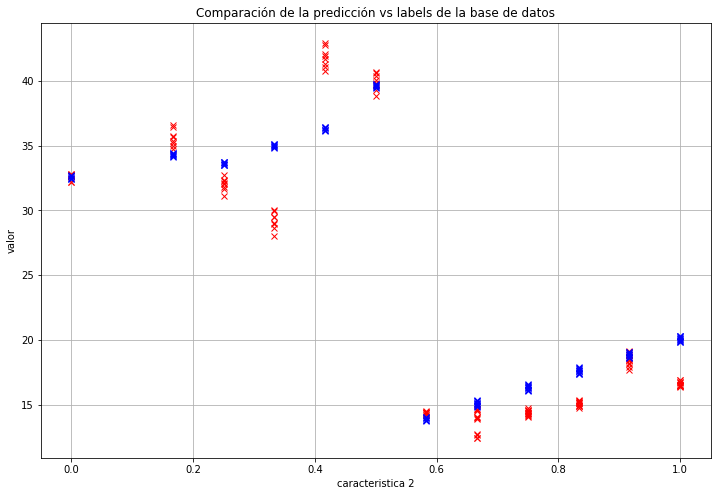

In [15]:
plt.rcParams['figure.figsize'] = (12,8)
plt.grid()
c = 1
plt.plot(X_test[:,c],y_test,'rx')
plt.plot(X_test[:,c],prediction_testing,'bx')
plt.title('Comparación de la predicción vs labels de la base de datos')
plt.xlabel('caracteristica '+ str(c+1))
plt.ylabel('valor')
plt.show()

In [16]:
print('error MAE de testing: ',ecm_testing)

error MAE de testing:  2.085343783026517
